# K-Medoids Clustering: Flood-prone Areas in Central Java Province, Indonesia

In [1]:
## for data
import numpy as np
import pandas as pd

## for plotting
import matplotlib.pyplot as plt
import seaborn as sns
import matplotlib.patches as mpatches

## for geospatial
import folium
import geopy

## for machine learning
from scipy.stats import gaussian_kde,zscore,chi2,f_oneway
from sklearn import preprocessing, cluster
from factor_analyzer import FactorAnalyzer
from sklearn.cluster import KMeans
from yellowbrick.cluster import KElbowVisualizer
from factor_analyzer import FactorAnalyzer
from sklearn_extra.cluster import KMedoids
from sklearn.metrics import silhouette_score, davies_bouldin_score, calinski_harabasz_score
import scipy

import warnings
warnings.filterwarnings("ignore")
%matplotlib inline

In [2]:
df = pd.read_excel(r"D:\Kuliah\Semester 6\Metode Penelitian\Banjir Jateng.xlsx")
df.columns.tolist()

['Kabupaten/Kota',
 'Frekuensi Banjir',
 'Genangan Sawah',
 'Genangan Tambak',
 'Genangan Pekarangan',
 'Genangan Pemukiman',
 'Genangan Jalan',
 'Kerusakan Jembatan',
 'Kerusakan Sekolah dan Kantor',
 'Kejadian Air limpas tanggus',
 'Kejadian Tanggul Jebol/Longsor',
 'Korban Mengungsi',
 'Korban Meninggal']

In [3]:
df

,Kabupaten/Kota,Frekuensi Banjir,Genangan Sawah,Genangan Tambak,Genangan Pekarangan,Genangan Pemukiman,Genangan Jalan,Kerusakan Jembatan,Kerusakan Sekolah dan Kantor,Kejadian Air limpas tanggus,Kejadian Tanggul Jebol/Longsor,Korban Mengungsi,Korban Meninggal
0,Kab. Demak,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,Kab. Kendal,5.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,4.0,1.0,NaN,NaN
2,Kota Semarang,1.0,NaN,NaN,NaN,2.0,NaN,NaN,1.0,1.0,NaN,NaN,NaN
3,Kab. Semarang,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,Kab. Batang,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.0,NaN,NaN,NaN
5,Kab. Kudus,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
6,Kab. Pati,35.0,335.0,NaN,15.0,819.0,4000.0,NaN,NaN,31.0,4.0,NaN,NaN
7,Kab. Rembang,13.0,NaN,NaN,NaN,983.0,300.0,NaN,NaN,13.0,NaN,NaN,NaN
8,Kab. Jepara,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
9,Kab. Grobogan,10.0,30.0,NaN,NaN,82.0,NaN,NaN,NaN,7.0,3.0,NaN,NaN


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30 entries, 0 to 29
Data columns (total 13 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   Kabupaten/Kota                  30 non-null     object 
 1   Frekuensi Banjir                19 non-null     float64
 2   Genangan Sawah                  6 non-null      float64
 3   Genangan Tambak                 0 non-null      float64
 4   Genangan Pekarangan             1 non-null      float64
 5   Genangan Pemukiman              9 non-null      float64
 6   Genangan Jalan                  2 non-null      float64
 7   Kerusakan Jembatan              0 non-null      float64
 8   Kerusakan Sekolah dan Kantor    1 non-null      float64
 9   Kejadian Air limpas tanggus     18 non-null     float64
 10  Kejadian Tanggul Jebol/Longsor  9 non-null      float64
 11  Korban Mengungsi                1 non-null      float64
 12  Korban Meninggal                0 non-

In [5]:
import pandas as pd

# Assuming 'df' is your DataFrame
df.fillna(0, inplace=True)

# Perform the operations
result_df = pd.DataFrame({
    "type": df.dtypes.values,
    "null": df.isnull().sum().values,
    "null_percentage": ["{:.2f}%".format(val) for val in df.isnull().sum().values / len(df) * 100],
    "unique": [df[i].nunique() for i in df.columns],
    "duplicated": df.duplicated().sum(),
    "sample": [list(pd.Series(df[i].unique()).sample())[0] for i in df.columns]
}).set_index(df.isnull().sum().index).sort_values("null", ascending=False)

In [6]:
df

,Kabupaten/Kota,Frekuensi Banjir,Genangan Sawah,Genangan Tambak,Genangan Pekarangan,Genangan Pemukiman,Genangan Jalan,Kerusakan Jembatan,Kerusakan Sekolah dan Kantor,Kejadian Air limpas tanggus,Kejadian Tanggul Jebol/Longsor,Korban Mengungsi,Korban Meninggal
0,Kab. Demak,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,Kab. Kendal,5.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,4.0,1.0,0.0,0.0
2,Kota Semarang,1.0,0.0,0.0,0.0,2.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0
3,Kab. Semarang,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,Kab. Batang,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
5,Kab. Kudus,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
6,Kab. Pati,35.0,335.0,0.0,15.0,819.0,4000.0,0.0,0.0,31.0,4.0,0.0,0.0
7,Kab. Rembang,13.0,0.0,0.0,0.0,983.0,300.0,0.0,0.0,13.0,0.0,0.0,0.0
8,Kab. Jepara,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
9,Kab. Grobogan,10.0,30.0,0.0,0.0,82.0,0.0,0.0,0.0,7.0,3.0,0.0,0.0


In [7]:
df.drop(['Genangan Tambak', 'Kerusakan Jembatan', 'Korban Meninggal', 'Genangan Pekarangan', 'Kerusakan Sekolah dan Kantor', 'Korban Mengungsi'], axis=1, inplace=True)

In [8]:
df

,Kabupaten/Kota,Frekuensi Banjir,Genangan Sawah,Genangan Pemukiman,Genangan Jalan,Kejadian Air limpas tanggus,Kejadian Tanggul Jebol/Longsor
0,Kab. Demak,0.0,0.0,0.0,0.0,0.0,0.0
1,Kab. Kendal,5.0,0.0,0.0,0.0,4.0,1.0
2,Kota Semarang,1.0,0.0,2.0,0.0,1.0,0.0
3,Kab. Semarang,0.0,0.0,0.0,0.0,0.0,0.0
4,Kab. Batang,1.0,0.0,0.0,0.0,1.0,0.0
5,Kab. Kudus,0.0,0.0,0.0,0.0,0.0,0.0
6,Kab. Pati,35.0,335.0,819.0,4000.0,31.0,4.0
7,Kab. Rembang,13.0,0.0,983.0,300.0,13.0,0.0
8,Kab. Jepara,0.0,0.0,0.0,0.0,0.0,0.0
9,Kab. Grobogan,10.0,30.0,82.0,0.0,7.0,3.0


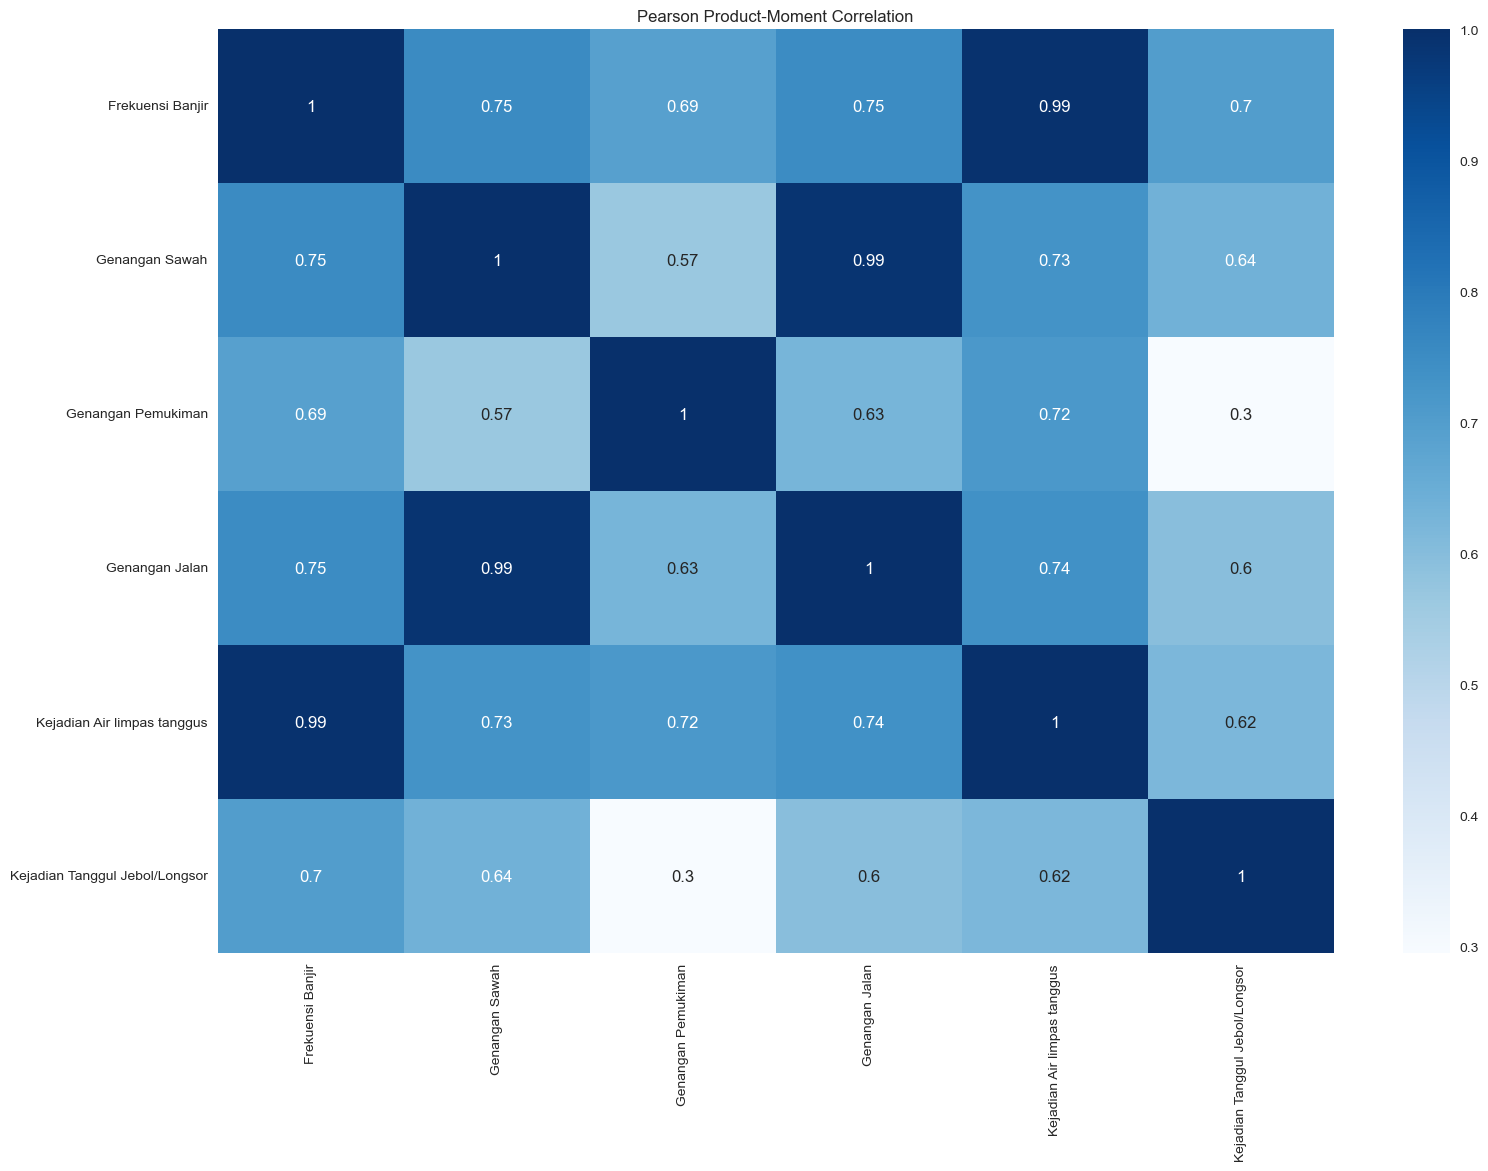

In [9]:
# Heatmap
plt.figure(figsize=(18,12))
sns.heatmap(df.corr(), annot=True, cmap='Blues')
plt.xticks(rotation=90)
plt.title("Pearson Product-Moment Correlation")
plt.show()

In [10]:
# Mengatur kolom 'Provinsi' sebagai index
df.set_index('Kabupaten/Kota', inplace=True)

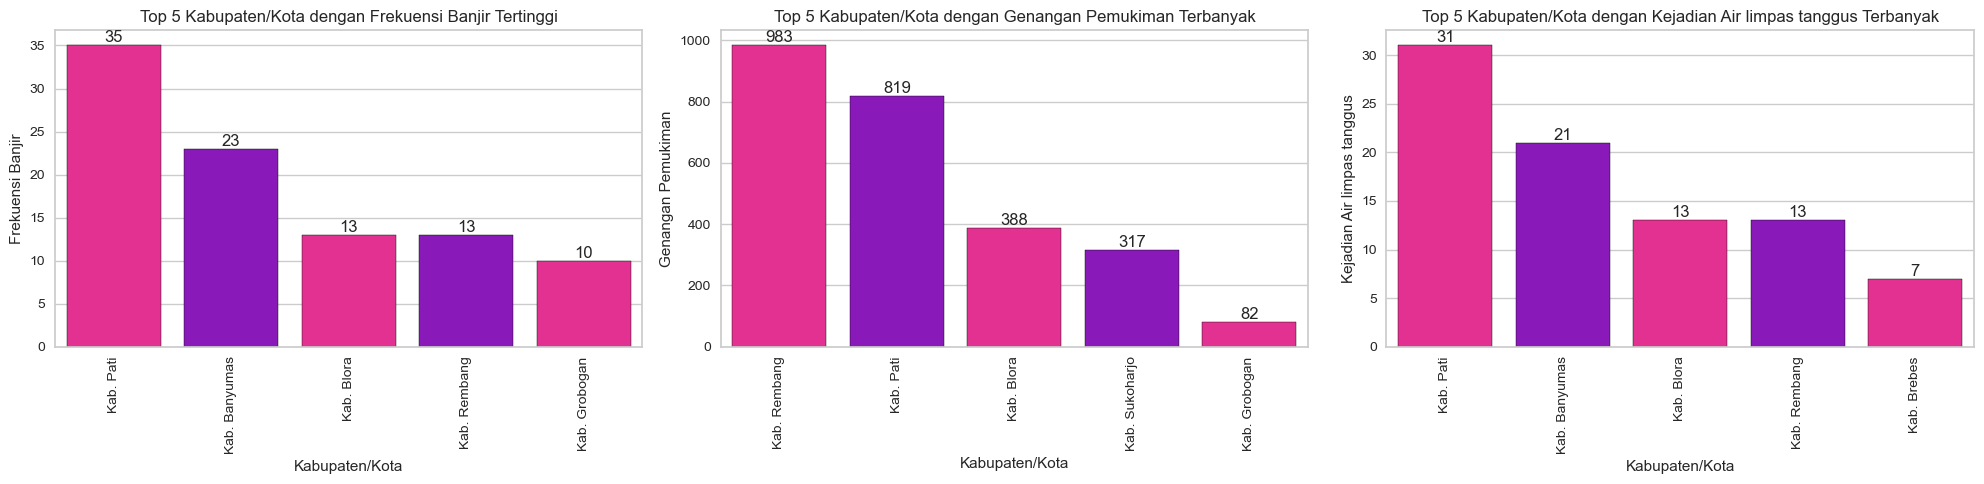

In [11]:
plt.figure(figsize=(20, 5))
colors = 'deeppink', 'darkviolet'

# Plot semua data dalam satu subplot
plt.subplot(1, 3, 1)
top_5_tbc = df.sort_values(by='Frekuensi Banjir', ascending=False).head(5)
ax1 = sns.barplot(x=top_5_tbc.index, y='Frekuensi Banjir', data=top_5_tbc, palette=colors, edgecolor='black')
plt.title('Top 5 Kabupaten/Kota dengan Frekuensi Banjir Tertinggi')
plt.xticks(rotation=90)
for rect in ax1.patches:
    height = rect.get_height()
    ax1.text(rect.get_x() + rect.get_width() / 2, height, int(height), ha='center', va='bottom')

# Plot Base Transceiver Station (BTS)
plt.subplot(1, 3, 2)
top_5_bts = df.sort_values(by='Genangan Pemukiman', ascending=False).head(5)
ax2 = sns.barplot(x=top_5_bts.index, y='Genangan Pemukiman', data=top_5_bts, palette=colors, edgecolor='black')
plt.title('Top 5 Kabupaten/Kota dengan Genangan Pemukiman Terbanyak')
plt.xticks(rotation=90)
for rect in ax2.patches:
    height = rect.get_height()
    ax2.text(rect.get_x() + rect.get_width() / 2, height, int(height), ha='center', va='bottom')

# Plot Penerima Sinyal Internet 4G/LTE
plt.subplot(1, 3, 3)
top_5_internet = df.sort_values(by='Kejadian Air limpas tanggus', ascending=False).head(5)
ax3 = sns.barplot(x=top_5_internet.index, y='Kejadian Air limpas tanggus', data=top_5_internet, palette=colors, edgecolor='black')
plt.title('Top 5 Kabupaten/Kota dengan Kejadian Air limpas tanggus Terbanyak')
plt.xticks(rotation=90)
for rect in ax3.patches:
    height = rect.get_height()
    ax3.text(rect.get_x() + rect.get_width() / 2, height, int(height), ha='center', va='bottom')

plt.tight_layout()
plt.show()

In [12]:
df.describe()

,Frekuensi Banjir,Genangan Sawah,Genangan Pemukiman,Genangan Jalan,Kejadian Air limpas tanggus,Kejadian Tanggul Jebol/Longsor
count,30.000000,30.000000,30.000000,30.000000,30.000000,30.000000
mean,4.666667,13.700000,90.900000,143.333333,4.100000,0.566667
std,7.782976,61.263788,238.935332,730.461986,7.072774,1.072648
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,1.500000,0.000000,0.000000,0.000000,1.000000,0.000000
75%,5.750000,0.000000,8.000000,0.000000,5.500000,1.000000
max,35.000000,335.000000,983.000000,4000.000000,31.000000,4.000000


In [13]:
# Transformasi data menggunakan zscore
df_t = df.copy().apply(zscore,ddof=1)
df_t

,Frekuensi Banjir,Genangan Sawah,Genangan Pemukiman,Genangan Jalan,Kejadian Air limpas tanggus,Kejadian Tanggul Jebol/Longsor
Kabupaten/Kota,,,,,,
Kab. Demak,-0.599599,-0.223623,-0.380438,-0.196223,-0.579688,-0.528287
Kab. Kendal,0.042829,-0.223623,-0.380438,-0.196223,-0.014139,0.403984
Kota Semarang,-0.471114,-0.223623,-0.372067,-0.196223,-0.438300,-0.528287
Kab. Semarang,-0.599599,-0.223623,-0.380438,-0.196223,-0.579688,-0.528287
Kab. Batang,-0.471114,-0.223623,-0.380438,-0.196223,-0.438300,-0.528287
Kab. Kudus,-0.599599,-0.223623,-0.380438,-0.196223,-0.579688,-0.528287
Kab. Pati,3.897395,5.244534,3.047268,5.279764,3.803317,3.200800
Kab. Rembang,1.070713,-0.223623,3.733646,0.214476,1.258346,-0.528287
Kab. Jepara,-0.599599,-0.223623,-0.380438,-0.196223,-0.579688,-0.528287


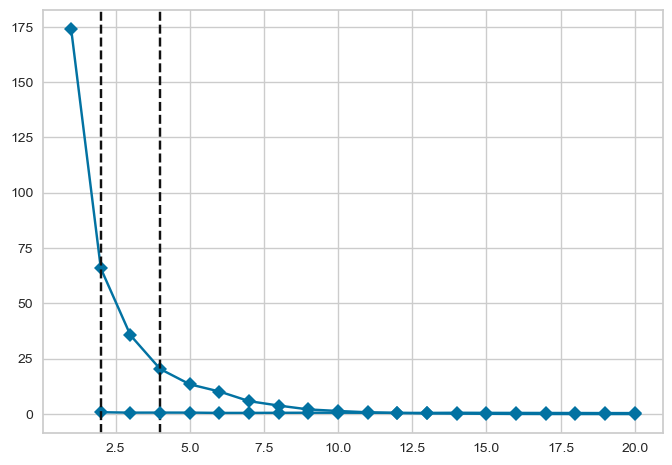

In [14]:
random_state = 13
start = 1
end = 20

scores,elbows_indexes,elbows_scores,methods = [],[],[],["distortion","silhouette"]

for method in methods:
    if method == "silhouette":
        start = 2
    
    kmeans_model = KMeans(init="k-means++",random_state=random_state)
    visualizer = KElbowVisualizer(kmeans_model,k=(start,end + 1),metric=method,timings=False)
    visualizer.fit(df_t)
    scores.append(visualizer.k_scores_)
    elbows_indexes.append(visualizer.elbow_value_)
    elbows_scores.append(visualizer.elbow_score_)

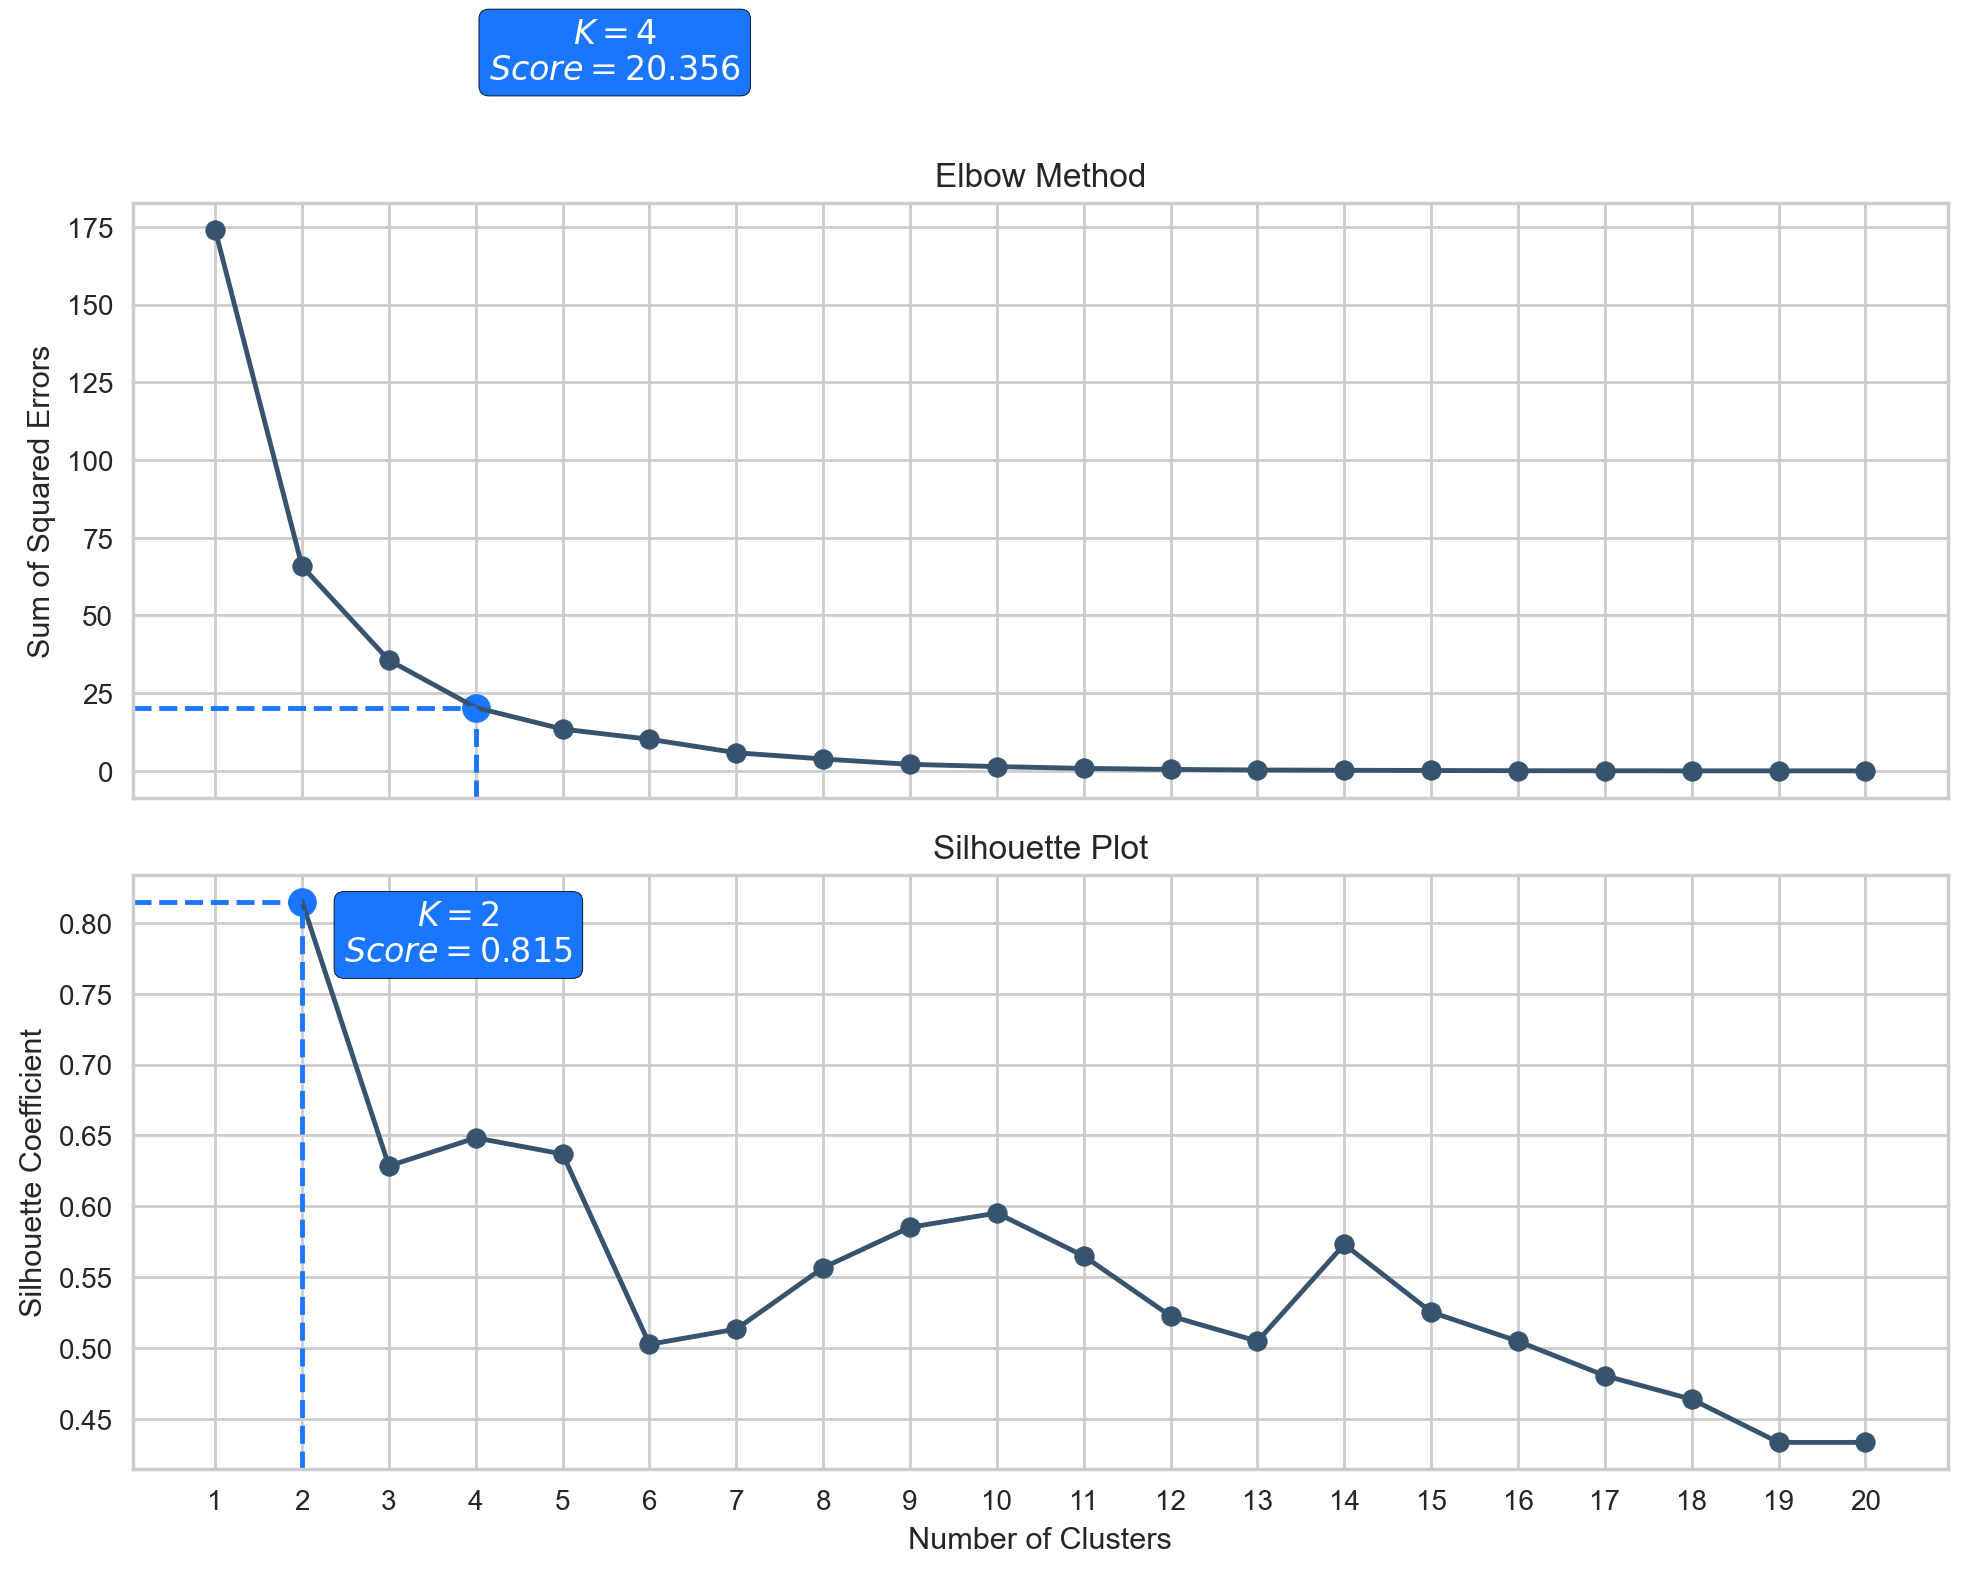

In [15]:
# Visualisasi Metode Elbow dan Metode Silhoutte

start = 1
end = 20

fig,ax = plt.subplots(2,1,figsize=(10,8),dpi=200,sharex=True)

# Elbow Method
ax[0].plot(range(start,end + 1),scores[0],color="#37536d")
ax[0].scatter(range(start,end + 1),scores[0],color="#37536d")
ax[0].scatter(elbows_indexes[0],elbows_scores[0],color="#1a76ff",s=100)
ax[0].set_xticks(range(start,end + 1))

xmin,xmax = ax[0].get_xlim()
ymin,ymax = ax[0].get_ylim()

ax[0].plot((xmin,elbows_indexes[0]),(elbows_scores[0],elbows_scores[0]),color="#1a76ff",linestyle="--")
ax[0].plot((elbows_indexes[0],elbows_indexes[0]),(ymin,elbows_scores[0]),color="#1a76ff",linestyle="--")
ax[0].set_xlim(xmin,xmax)
ax[0].set_ylim(ymin,ymax)
ax[0].set_title("Elbow Method")
ax[0].set_ylabel("Sum of Squared Errors")
ax[0].text(
    x=elbows_indexes[0] + 1.6,
    y=elbows_scores[0] + 2_00,
    horizontalalignment="center",
    verticalalignment="bottom",
    s=f"$ K = {elbows_indexes[0]} $\n$ Score = {round(elbows_scores[0],3)} $",
    color="white",
    fontweight="bold",
    bbox=dict(x=0,facecolor="#1a76ff",boxstyle="round"),
)

# Silhouette Plot
ax[1].plot(range(start + 1,end + 1),scores[1],color="#37536d")
ax[1].scatter(range(start + 1,end + 1),scores[1],color="#37536d")
ax[1].scatter(elbows_indexes[1],elbows_scores[1],color="#1a76ff",s=100)
ax[1].set_xticks(range(start,end + 1))

xmin,xmax = ax[1].get_xlim()
ymin,ymax = ax[1].get_ylim()

ax[1].plot((xmin,elbows_indexes[1]),(elbows_scores[1],elbows_scores[1]),color="#1a76ff",linestyle="--")
ax[1].plot((elbows_indexes[1],elbows_indexes[1]),(ymin,elbows_scores[1]),color="#1a76ff",linestyle="--")
ax[1].set_xlim(xmin,xmax)
ax[1].set_ylim(ymin,ymax)
ax[1].set_title("Silhouette Plot")
ax[1].set_xlabel("Number of Clusters")
ax[1].set_ylabel("Silhouette Coefficient")
ax[1].text(
    x=elbows_indexes[1] + 1.8,
    y=elbows_scores[1],
    horizontalalignment="center",
    verticalalignment="top",
    s=f"$ K = {elbows_indexes[1]} $\n$ Score = {round(elbows_scores[1],3)} $",
    color="white",
    fontweight="bold",
    bbox=dict(x=0,facecolor="#1a76ff",boxstyle="round")
)

plt.tight_layout()
plt.show()

In [16]:
from yellowbrick.cluster import KElbowVisualizer,SilhouetteVisualizer

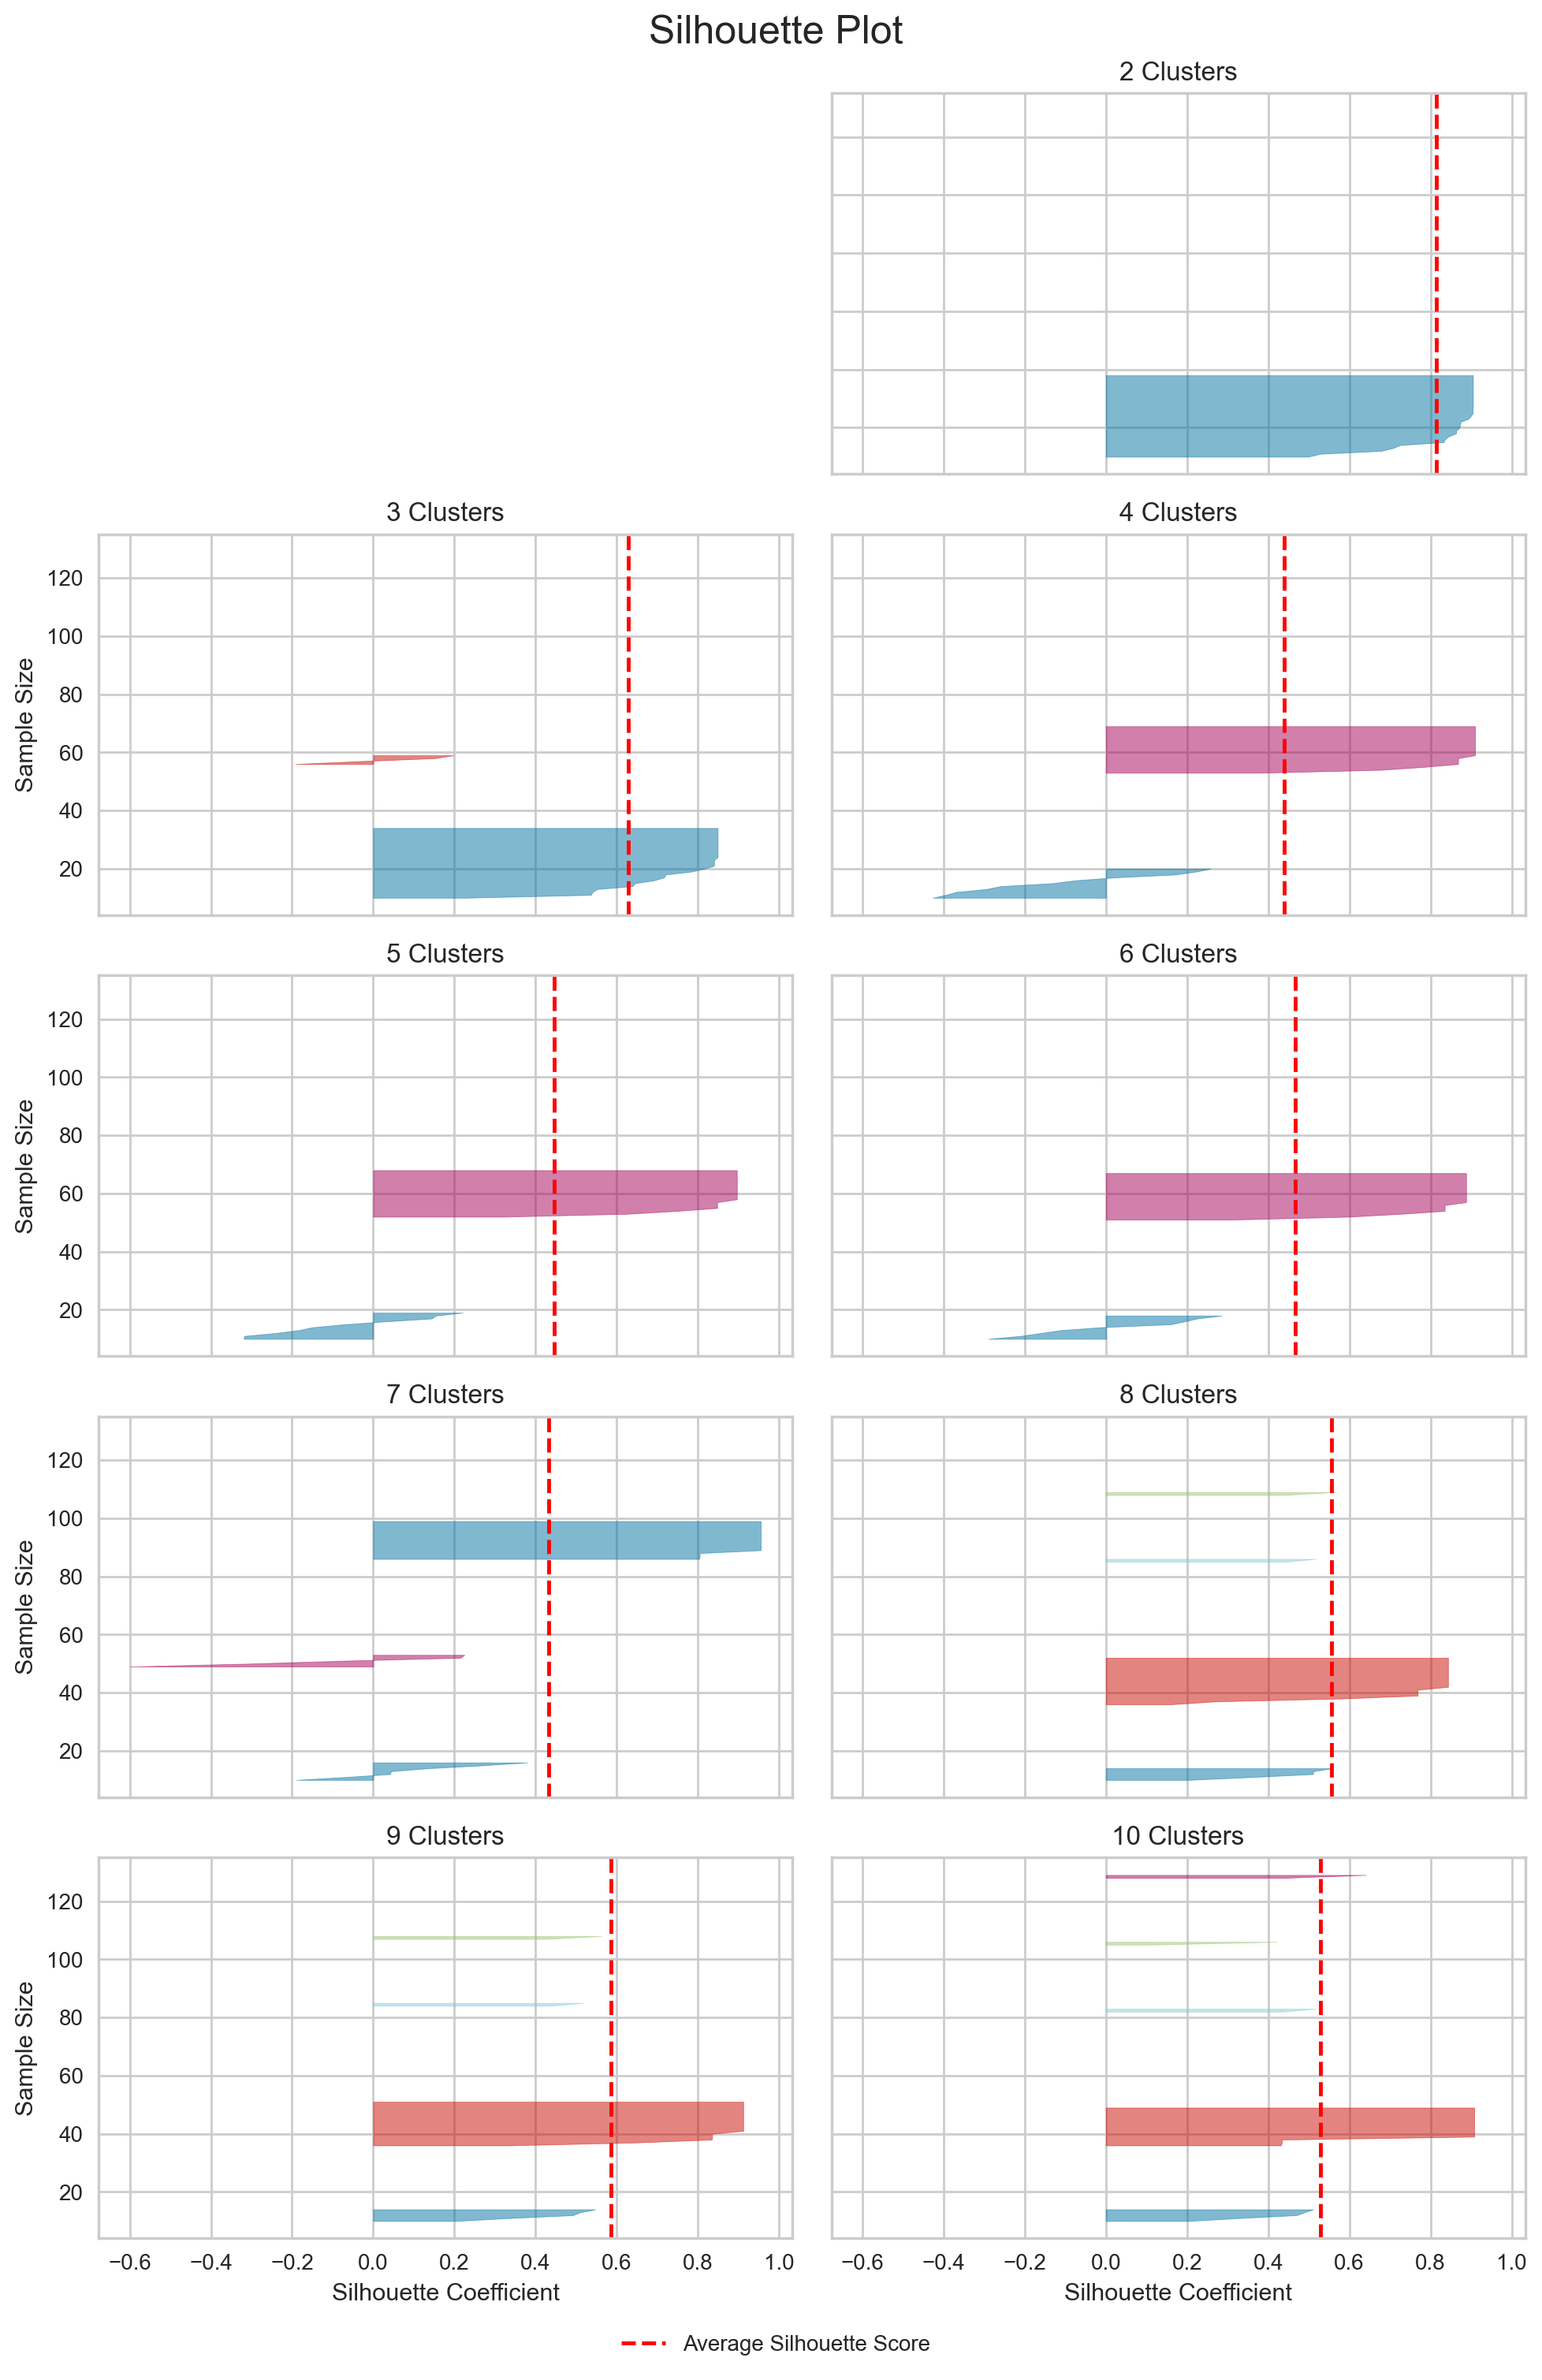

In [17]:
start = 2
end = 10

nrow,ncol = 5,2
fig,ax = plt.subplots(nrow,ncol,figsize=(10,15),dpi=200,sharex=True,sharey=True)

for k in range(start,end + 2):
    q,mod = divmod(k,2)

    if ((q - 1) == 0) & (mod == 0):
        pass
    else:
        k -= 1
        kmedoids_model = KMedoids(n_clusters=k,init="k-medoids++",random_state=random_state)
        visualizer = SilhouetteVisualizer(kmedoids_model,colors="yellowbrick",ax=ax[q - 1][mod])
        visualizer.fit(df_t)

        ax[q - 1][mod].set_title(f"{k} Clusters")
        
        if mod == 0:
            ax[q - 1][mod].set_ylabel("Sample Size")
        if (q - 1) == (nrow - 1):
            ax[q - 1][mod].set_xlabel("Silhouette Coefficient")

for axes in ax.flat:
    if not bool(axes.has_data()):
        fig.delaxes(axes)
    
handles,labels = ax[q - 1][mod].get_legend_handles_labels()
fig.legend(handles,labels,loc="center",bbox_to_anchor=(0.5,-0.005))

plt.suptitle("Silhouette Plot",fontsize=18)
plt.tight_layout()
plt.show()

In [18]:
kmedoids_model = KMedoids(n_clusters=2, init='k-medoids++', random_state=3)
kmedoids_model.fit(df_t)

KMedoids(init='k-medoids++', n_clusters=2, random_state=3)

In [19]:
# Menginisialisasi dan melatih model KMedoids
kmedoids_model = KMedoids(n_clusters=2, init='k-medoids++', random_state=3)
kmedoids_model.fit(df_t)

# Menyimpan pusat klaster untuk setiap iterasi
clusters = []
for iteration in range(1, kmedoids_model.n_iter_ + 1):
    temp_model = KMedoids(n_clusters=2, init='k-medoids++', random_state=3, max_iter=iteration)
    temp_model.fit(df_t)
    clusters.append(temp_model.cluster_centers_)

# Mengatur data untuk DataFrame
cluster_data = np.vstack(clusters)

# Membuat MultiIndex untuk DataFrame
first_index = sum([[f"Iteration {iteration}" for _ in range(kmedoids_model.n_clusters)] for iteration in range(1, kmedoids_model.n_iter_ + 1)], [])
second_index = [f"Cluster {cluster + 1}" for cluster in range(kmedoids_model.n_clusters)] * kmedoids_model.n_iter_
multi_index = pd.MultiIndex.from_arrays([first_index, second_index])

# Membuat DataFrame dari sejarah iterasi pusat klaster
iteration_history = pd.DataFrame(
    data=cluster_data,
    columns=df.columns,
    index=multi_index
)
iteration_history

Frekuensi Banjir  Genangan Sawah  Genangan Pemukiman  \
Iteration 1 Cluster 1          1.070713       -0.223623            1.243433   
            Cluster 2         -0.599599       -0.223623           -0.380438   

                       Genangan Jalan  Kejadian Air limpas tanggus  \
Iteration 1 Cluster 1       -0.196223                     1.258346   
            Cluster 2       -0.196223                    -0.579688   

                       Kejadian Tanggul Jebol/Longsor  
Iteration 1 Cluster 1                       -0.528287  
            Cluster 2                       -0.528287

In [20]:
final_cluster_centers = pd.DataFrame(
    data=kmedoids_model.cluster_centers_,
    columns=df_t.columns,
    index=[f"Cluster {cluster}" for cluster in range(kmedoids_model.n_clusters)]
).T
final_cluster_centers

,Cluster 0,Cluster 1
Frekuensi Banjir,1.070713,-0.599599
Genangan Sawah,-0.223623,-0.223623
Genangan Pemukiman,1.243433,-0.380438
Genangan Jalan,-0.196223,-0.196223
Kejadian Air limpas tanggus,1.258346,-0.579688
Kejadian Tanggul Jebol/Longsor,-0.528287,-0.528287


In [21]:
df_labeled = df_t.copy()
df_labeled["Cluster"] = kmedoids_model.labels_
df_labeled["Distance"] = np.min(kmedoids_model.transform(df_t),axis=1)
df_labeled

,Frekuensi Banjir,Genangan Sawah,Genangan Pemukiman,Genangan Jalan,Kejadian Air limpas tanggus,Kejadian Tanggul Jebol/Longsor,Cluster,Distance
Kabupaten/Kota,,,,,,,,
Kab. Demak,-0.599599,-0.223623,-0.380438,-0.196223,-0.579688,-0.528287,1,0.000000
Kab. Kendal,0.042829,-0.223623,-0.380438,-0.196223,-0.014139,0.403984,1,1.265579
Kota Semarang,-0.471114,-0.223623,-0.372067,-0.196223,-0.438300,-0.528287,1,0.191230
Kab. Semarang,-0.599599,-0.223623,-0.380438,-0.196223,-0.579688,-0.528287,1,0.000000
Kab. Batang,-0.471114,-0.223623,-0.380438,-0.196223,-0.438300,-0.528287,1,0.191047
Kab. Kudus,-0.599599,-0.223623,-0.380438,-0.196223,-0.579688,-0.528287,1,0.000000
Kab. Pati,3.897395,5.244534,3.047268,5.279764,3.803317,3.200800,0,9.566300
Kab. Rembang,1.070713,-0.223623,3.733646,0.214476,1.258346,-0.528287,0,2.523854
Kab. Jepara,-0.599599,-0.223623,-0.380438,-0.196223,-0.579688,-0.528287,1,0.000000


In [22]:
# Membuat radar chart untuk melihat karakteristik klaster
features = list(df_labeled.columns[:-2])
num_vars = len(features)

In [23]:
# Jumlah klaster
n_clusters = len(df_labeled['Cluster'].unique())

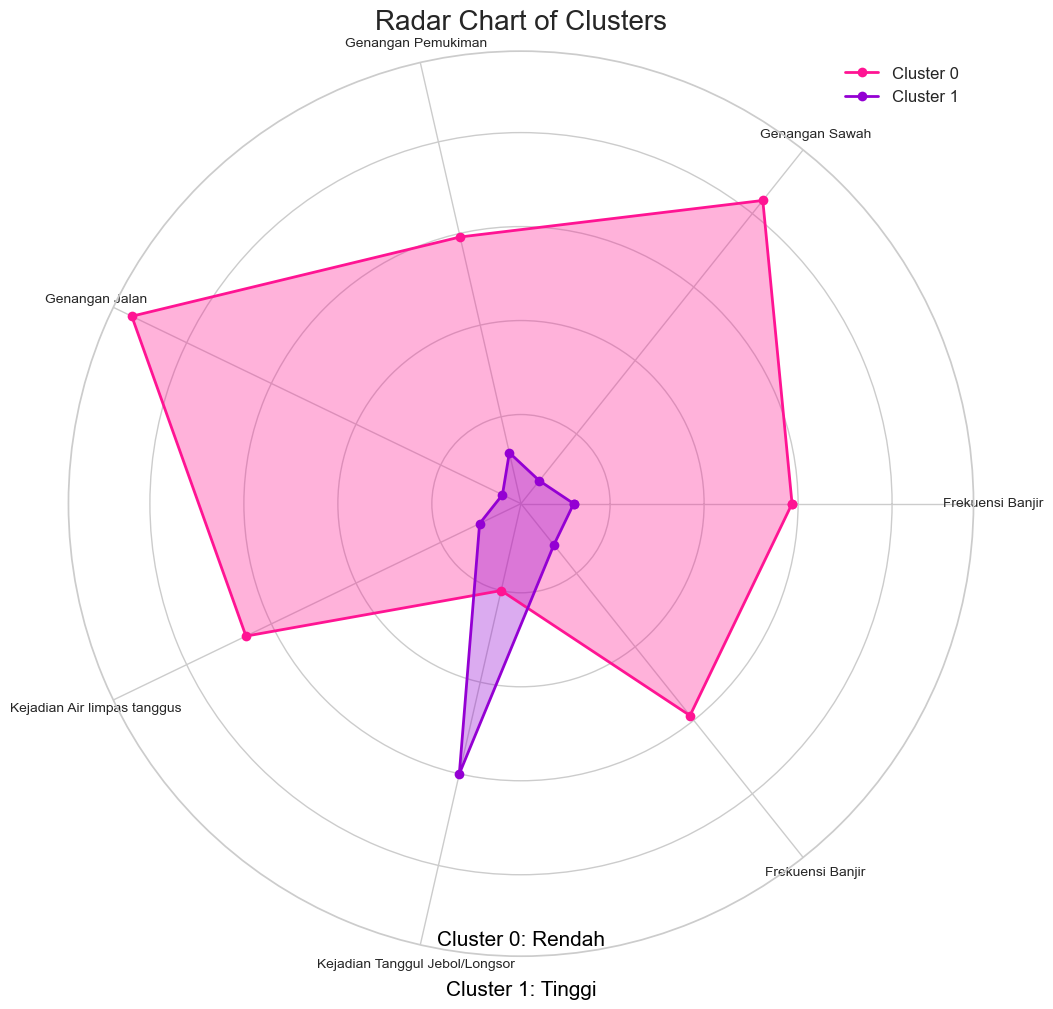

In [24]:
# Daftar warna yang akan digunakan untuk setiap klaster
colors = ['deeppink', 'darkviolet']

# Plot radar chart
plt.figure(figsize=(15, 10))

for i in range(n_clusters):
    cluster_data = df_labeled[df_labeled['Cluster'] == i].mean()[1:-1].values
    values = cluster_data
    categories = features

    # Menambahkan kategori pertama ke akhir untuk melengkapi lingkaran radar
    values = np.concatenate((values, [values[0]]))
    categories = np.concatenate((categories, [categories[0]]))

    # Jumlah sudut yang akan digunakan dalam radar chart
    angles = np.linspace(0, 2 * np.pi, len(categories), endpoint=False).tolist()

    # Menambahkan sudut pertama ke akhir untuk melengkapi lingkaran radar
    values = np.concatenate((values, [values[0]]))
    angles += angles[:1]

    # Membuat plot dengan warna yang berbeda untuk setiap klaster
    ax = plt.subplot(1, 1, 1, polar=True)
    ax.fill(angles, values, color=colors[i], alpha=0.1)
    ax.plot(angles, values, 'o-', color=colors[i], linewidth=2, label='Cluster {}'.format(i))
    ax.fill(angles, values, color=colors[i], alpha=0.25)
    ax.set_yticklabels([])
    ax.set_xticks(angles[:-1])
    ax.set_xticklabels(categories, size=10)
    plt.yticks(size=10)

    # Menambahkan keterangan klaster
    cluster_label = 'Tinggi' if i == 1 else 'Rendah'
    plt.figtext(0.5, 0.05 - i * 0.05, 'Cluster {}: {}'.format(i, cluster_label),
                ha='center', va='center', size=15, color='black')

# Menambahkan legenda
plt.legend(loc='upper right', fontsize=12)

plt.title('Radar Chart of Clusters', size=20)
plt.tight_layout()
plt.show()

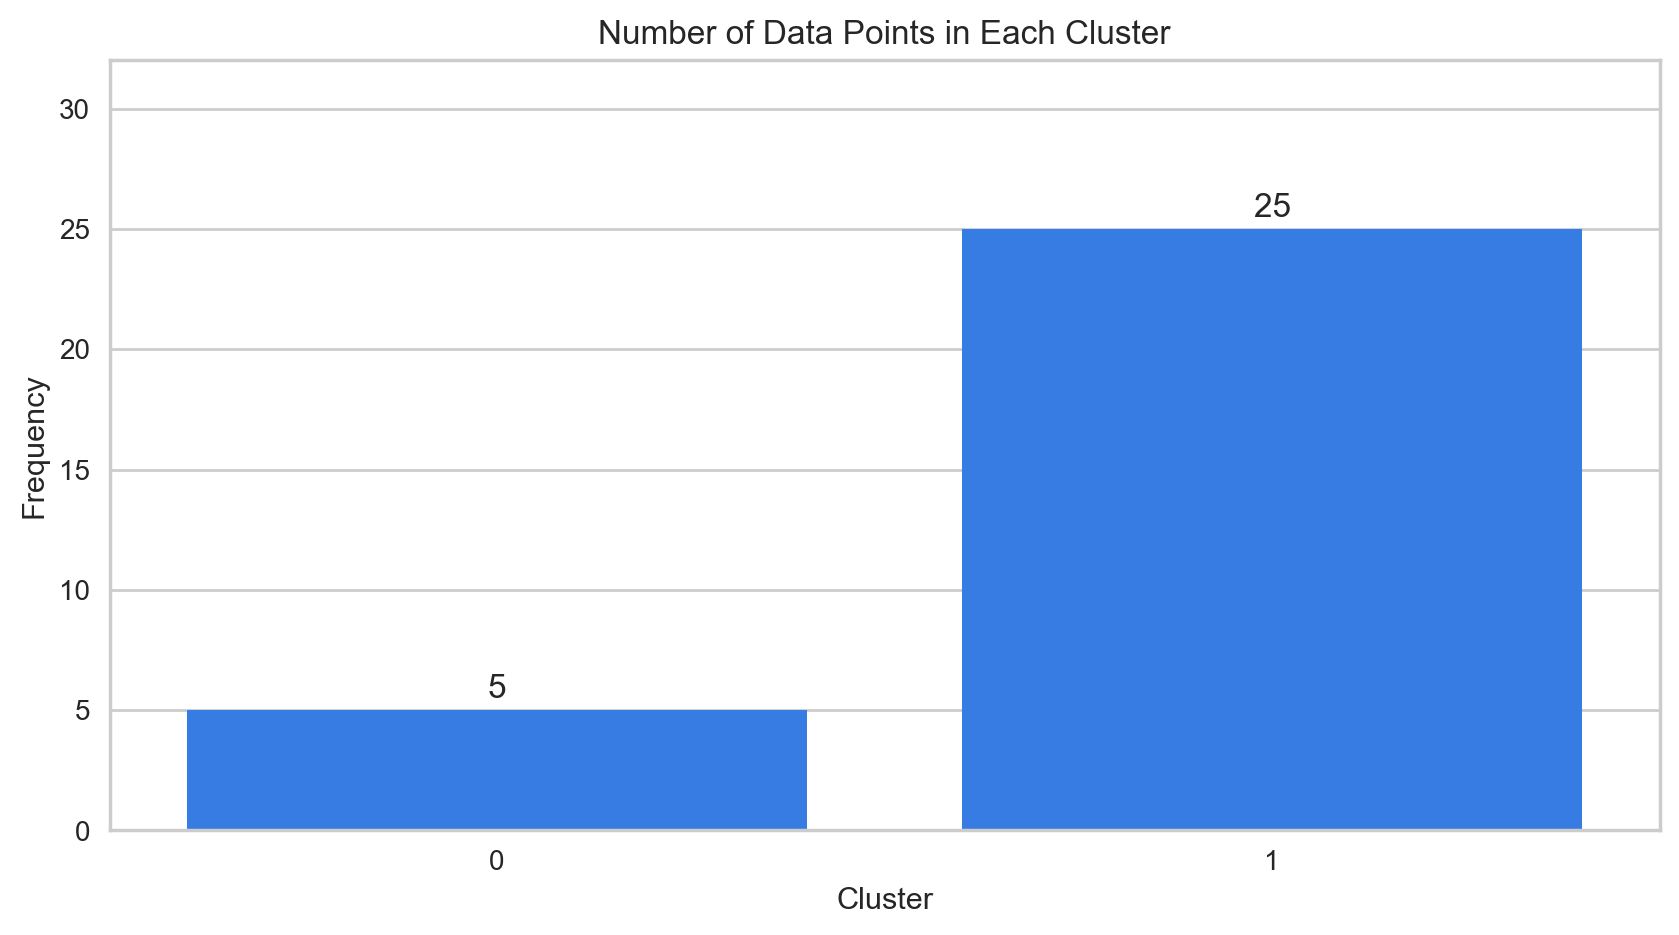

In [25]:
fig,ax = plt.subplots(figsize=(10,5),dpi=200)

sns.countplot(data=df_labeled,x="Cluster",color="#1a76ff")
ax.set_title("Number of Data Points in Each Cluster")
ax.set_ylim(ymax=32)
ax.set_ylabel("Frequency")

for bars in ax.containers:
    ax.bar_label(bars,fmt="%.0f",padding=2,fontweight=500)

plt.show()

In [26]:
from scipy.stats import f_oneway

stats, p_values = [], []
for feature in df_t.columns:
    groups = [df_t[feature][kmedoids_model.labels_ == label] for label in range(kmedoids_model.n_clusters)]
    stat, p_value = f_oneway(*groups)
    stats.append(stat)
    p_values.append(p_value)

anova = pd.DataFrame(
    data={"F": stats, "P-Value": p_values},
    index=[f"Variabel {cluster + 1}" for cluster in range(len(stats))]
)
anova

,F,P-Value
Variabel 1,60.122880,1.905307e-08
Variabel 2,6.732781,1.489711e-02
Variabel 3,30.636882,6.439696e-06
Variabel 4,6.963094,1.343814e-02
Variabel 5,61.818680,1.453266e-08
Variabel 6,10.542354,3.023204e-03


In [27]:
df_labeled.groupby('Cluster').mean()

,Frekuensi Banjir,Genangan Sawah,Genangan Pemukiman,Genangan Jalan,Kejadian Air limpas tanggus,Kejadian Tanggul Jebol/Longsor,Distance
Cluster,,,,,,,
0,1.815929,0.967945,1.589133,0.981114,1.823895,1.149802,3.635992
1,-0.363186,-0.193589,-0.317827,-0.196223,-0.364779,-0.229960,0.568014


In [28]:
# Menambahkan Kolom baru 'KMEANS_SEGMENT' pada Dataframe.
labels = kmedoids_model.labels_
cluster_centers = kmedoids_model.cluster_centers_

In [29]:
# Menghitung metrik-metrik evaluasi
Inertia = round(kmedoids_model.inertia_, 2)
silhouette_avg_kmedoids = round(silhouette_score(df_t, labels), 5)
davies_bouldin_kmedoids = round(davies_bouldin_score(df_t, labels), 5)
calinski_harabasz_kmedoids = round(calinski_harabasz_score(df_t, labels), 5)

test_kmedoids = pd.DataFrame({'KMedoids': [Inertia, silhouette_avg_kmedoids,
                                       davies_bouldin_kmedoids,
                                       calinski_harabasz_kmedoids]},
index=['Inertia', 'Silhouette Score', 'Davies-Bouldin', 'Calinski-Harabasz'])
test_kmedoids

,KMedoids
Inertia,32.38000
Silhouette Score,0.65591
Davies-Bouldin,1.02901
Calinski-Harabasz,20.83060
